# Project 7: Introduction to Machine Learning

Author: Elom Gbogbo

https://github.com/egbogbo11/datafun-07-ml

## Import Dependencies

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

Follow the instructions from 10.16 (starting page 414).

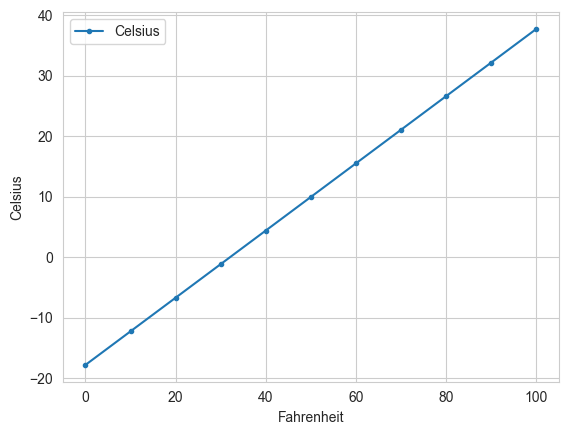

In [426]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range (0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

Continue following the instructions from 10.16 (starting page 416).

### Section 1 - Data Acquisition

Follow the instructions to load NY City January high temperature from a csv file into a DataFrame. Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.

In [427]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

Follow the instructions to view head and tail of the file. 

In [428]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [429]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning


Follow the instructions to clean the data. Improve the column names and clean up the date series. 

In [430]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [431]:
nyc_df.Date.dtype

dtype('int64')

In [432]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

Set the display precision to 2 decimal places. Use 'display.precision' instead of 'precision' as shown in the text. Use describe() to calculate basic descriptive statistics for the dataset. 


In [433]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [434]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [435]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

Use your model to predict the "average high temp in Jan" for the year 2024 (just like they did for 2019).

In [436]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and the y scale as directed. Customize your chart and notebook as you like to make your work clear and compelling. 


(10.0, 70.0)

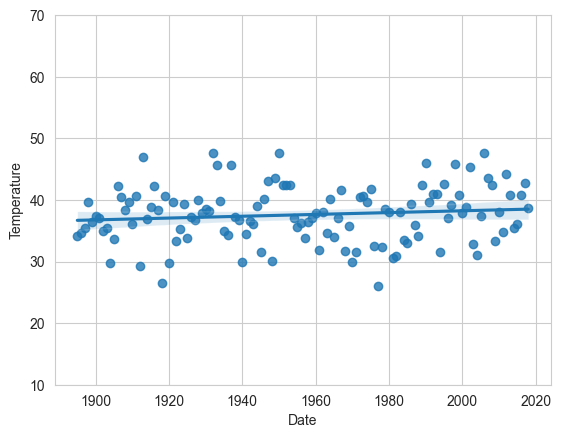

In [437]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

Continue the project by following the steps in 15.4 (staring page 620 in your textbook). 


Section 1 - Build the Model

In [438]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)
print(X_train.shape, X_test.shape)

(93, 1) (31, 1)


In [439]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(linear_regression.coef_)
print(linear_regression.intercept_)

[0.01939167]
-0.30779820252656975


### Section 2 - Test the Model

Test the model as directed.

In [440]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


### Section 3 - Predict

Use your model to predict the "average high temp in Jan" for the year 2024 (like they did for 2019).

In [441]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 4 - Visualizations

Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and the y scale as directed. Customize your chart and notebook as you like to make your work clear and compelling. 

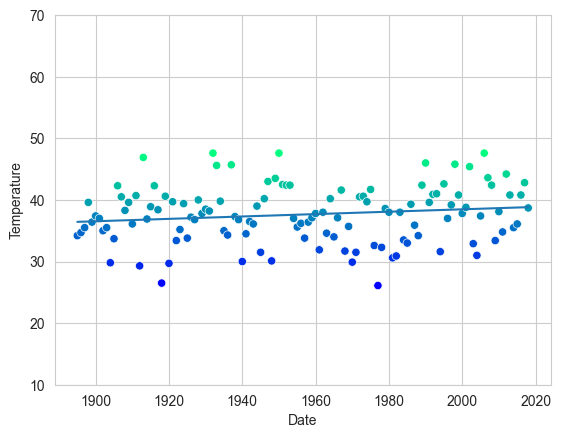

In [442]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x =np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)